<a href="https://colab.research.google.com/github/ChitranshBose/CSE508_Winter2023_A2_47/blob/main/IR_A2_47_ASSIGN2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
from math import factorial as fact 
from math import log2 as lg 
import matplotlib.pyplot as plt

In [2]:
# creating a header for the dataframe
heading = ['relevance', 'q_id']

for i in range(1,138):
  heading.append("feature"+str(i))
print(heading)

['relevance', 'q_id', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34', 'feature35', 'feature36', 'feature37', 'feature38', 'feature39', 'feature40', 'feature41', 'feature42', 'feature43', 'feature44', 'feature45', 'feature46', 'feature47', 'feature48', 'feature49', 'feature50', 'feature51', 'feature52', 'feature53', 'feature54', 'feature55', 'feature56', 'feature57', 'feature58', 'feature59', 'feature60', 'feature61', 'feature62', 'feature63', 'feature64', 'feature65', 'feature66', 'feature67', 'feature68', 'feature69', 'feature70', 'feature71', 'feature72', 'feature73', 'feature74', 'feature75', 'feature76',

**Preprocess**

In [3]:
# reading data and assigning headers
data = pd.read_csv("IR-assignment-2-data (2).txt", sep= " ",names=heading)
data.drop(['feature137'],axis=1,inplace=True)

data

,relevance,q_id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3600,1,qid:529,1:1,2:0,3:0,4:0,5:1,6:1,7:0,8:0,...,127:38,128:0,129:3,130:35419,131:55672,132:6,133:3,134:0,135:0,136:0
3601,1,qid:529,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,...,127:41,128:1994,129:24,130:42795,131:65535,132:3,133:2,134:0,135:0,136:0
3602,1,qid:529,1:1,2:0,3:1,4:1,5:1,6:1,7:0,8:1,...,127:65,128:205,129:1,130:38263,131:36737,132:10,133:4,134:0,135:0,136:0
3603,1,qid:529,1:1,2:0,3:1,4:1,5:1,6:1,7:0,8:1,...,127:33,128:130765,129:1,130:62990,131:44728,132:2,133:4,134:0,135:33,136:33.437380952381


In [4]:
# keeping the data with qid:4
data = data[data['q_id']=='qid:4']
data

,relevance,q_id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:62,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,127:52,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:28,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:23,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688


In [ ]:
# splitting the query-url pair and keeping the url
names = data.columns
for col in names:
  print(col)
  if col!='relevance':
    data[col] = data[col].str.split(":",expand=True)[1]


In [9]:
# finding the relevance score of each row
l = data.shape[0]
rel_score = {}
for i in range(l):
  rel_score[i]=data['relevance'][i]
print(rel_score)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 1, 7: 3, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0, 13: 1, 14: 0, 15: 0, 16: 0, 17: 1, 18: 2, 19: 2, 20: 1, 21: 2, 22: 2, 23: 0, 24: 1, 25: 2, 26: 0, 27: 0, 28: 0, 29: 1, 30: 0, 31: 0, 32: 1, 33: 0, 34: 2, 35: 0, 36: 2, 37: 2, 38: 1, 39: 0, 40: 2, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 2, 53: 1, 54: 0, 55: 1, 56: 0, 57: 0, 58: 2, 59: 0, 60: 1, 61: 2, 62: 2, 63: 0, 64: 0, 65: 0, 66: 1, 67: 0, 68: 2, 69: 0, 70: 0, 71: 0, 72: 1, 73: 0, 74: 1, 75: 1, 76: 2, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 1, 83: 1, 84: 1, 85: 1, 86: 0, 87: 0, 88: 1, 89: 0, 90: 2, 91: 0, 92: 1, 93: 0, 94: 0, 95: 0, 96: 1, 97: 0, 98: 0, 99: 1, 100: 2, 101: 1, 102: 0}


In [10]:
import operator as op

In [13]:
# sorting the enteries in non-increasing order of relevance
# that will arrange query-url pair in max. order of dcg
rel_score_sort = sorted(rel_score.items(), key=op.itemgetter(1),reverse=True)
rel_score_sort = dict(rel_score_sort)
print(rel_score_sort)

{7: 3, 18: 2, 19: 2, 21: 2, 22: 2, 25: 2, 34: 2, 36: 2, 37: 2, 40: 2, 52: 2, 58: 2, 61: 2, 62: 2, 68: 2, 76: 2, 90: 2, 100: 2, 4: 1, 6: 1, 10: 1, 13: 1, 17: 1, 20: 1, 24: 1, 29: 1, 32: 1, 38: 1, 53: 1, 55: 1, 60: 1, 66: 1, 72: 1, 74: 1, 75: 1, 82: 1, 83: 1, 84: 1, 85: 1, 88: 1, 92: 1, 96: 1, 99: 1, 101: 1, 0: 0, 1: 0, 2: 0, 3: 0, 5: 0, 8: 0, 9: 0, 11: 0, 12: 0, 14: 0, 15: 0, 16: 0, 23: 0, 26: 0, 27: 0, 28: 0, 30: 0, 31: 0, 33: 0, 35: 0, 39: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 54: 0, 56: 0, 57: 0, 59: 0, 63: 0, 64: 0, 65: 0, 67: 0, 69: 0, 70: 0, 71: 0, 73: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 86: 0, 87: 0, 89: 0, 91: 0, 93: 0, 94: 0, 95: 0, 97: 0, 98: 0, 102: 0}


In [14]:
#finding the unique relevance scores
rel = data['relevance'].unique()
print(rel)

[0 1 3 2]


In [15]:
#intialization 
freq_0 = 0
freq_1 = 0 
freq_2 = 0
freq_3 = 0


**No. of files with max DCG of query-url pair**

In [18]:
# calculating the no. of file permutaions  with max dcg 
for x in rel_score_sort.values():
  if x == 0:
    freq_0+=1
  elif x == 1:
    freq_1+=1
  elif x == 2:
    freq_2+=1
  else:
    freq_3+=1

print("No. of combination of files for max dcg: ",fact(freq_0)* fact(freq_1) * fact(freq_2) * fact(freq_3))


No. of combination of files for max dcg:  22310465493253739894902879936548049503487431045755989157500624218163359607230017248633477976132453553838413233198198306731552699614069941449236452572344726213677564353946648566831766955596401399261780046241788867202472600715958536101264752138232693228830720000000000000000000000000000000000000000000000


In [27]:
print("Relevance score: ",rel_score)
print("Relevance score after sorting(ideal): ",rel_score_sort)

Relevance score:  {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 1, 7: 3, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0, 13: 1, 14: 0, 15: 0, 16: 0, 17: 1, 18: 2, 19: 2, 20: 1, 21: 2, 22: 2, 23: 0, 24: 1, 25: 2, 26: 0, 27: 0, 28: 0, 29: 1, 30: 0, 31: 0, 32: 1, 33: 0, 34: 2, 35: 0, 36: 2, 37: 2, 38: 1, 39: 0, 40: 2, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 2, 53: 1, 54: 0, 55: 1, 56: 0, 57: 0, 58: 2, 59: 0, 60: 1, 61: 2, 62: 2, 63: 0, 64: 0, 65: 0, 66: 1, 67: 0, 68: 2, 69: 0, 70: 0, 71: 0, 72: 1, 73: 0, 74: 1, 75: 1, 76: 2, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 1, 83: 1, 84: 1, 85: 1, 86: 0, 87: 0, 88: 1, 89: 0, 90: 2, 91: 0, 92: 1, 93: 0, 94: 0, 95: 0, 96: 1, 97: 0, 98: 0, 99: 1, 100: 2, 101: 1, 102: 0}
Relevance score after sorting(ideal):  {7: 3, 18: 2, 19: 2, 21: 2, 22: 2, 25: 2, 34: 2, 36: 2, 37: 2, 40: 2, 52: 2, 58: 2, 61: 2, 62: 2, 68: 2, 76: 2, 90: 2, 100: 2, 4: 1, 6: 1, 10: 1, 13: 1, 17: 1, 20: 1, 24: 1, 29: 1, 32: 1, 38: 1, 53: 1, 55: 1, 60: 1, 66: 1, 72: 1

In [19]:
# function to compute dcg
def compute_dcg(data,size):
  data = list(data.values())
  res = data[0]
  for i in range(1,size):
    res+= data[i]/(lg(i+1)) # formula for calculating dcg
  return res

**Calculating nDCG**

In [28]:
#calculating the nDCG for entire dataset
sort_dcg = compute_dcg(rel_score_sort,len(rel_score_sort))

unsort_dcg = compute_dcg(rel_score,len(rel_score))

print("nDCG for complete dataset is: ",unsort_dcg/sort_dcg)

nDCG for complete dataset is:  0.5979226516897831


In [30]:
# nDCG for position 50
sort_dcg_50 = compute_dcg(rel_score_sort,51)

unsort_dcg_50 = compute_dcg(rel_score,51)

print("nDCG for position 50: ",unsort_dcg_50/sort_dcg_50)

nDCG for position 50:  0.3521042740324887


**Ranking on feature 75**

In [33]:
# function to find the relevance score and feature value of feature 75
def relevant_tf(data, tf_pair):
  size = len(data)
  for i in range(size):
    feat75 = float(data.at[i,'feature75'])
    relv = data.at[i,'relevance']
    x = (relv,feat75)
    tf_pair[i] = x
  return tf_pair

In [34]:
tf = {}
tf = relevant_tf(data,tf)
print(tf)

{0: (0, 90.53171), 1: (0, 538.388954), 2: (0, 88.171761), 3: (0, 144.564444), 4: (1, 142.589323), 5: (0, 463.099129), 6: (1, 103.400313), 7: (3, 411.010633), 8: (0, 972.826451), 9: (0, 142.589323), 10: (1, 84.625987), 11: (0, 91.160998), 12: (0, 180.720002), 13: (1, 237.21632), 14: (0, 22.480108), 15: (0, 84.625987), 16: (0, 14.972391), 17: (1, 42.227139), 18: (2, 81.947653), 19: (2, 157.05992), 20: (1, 84.625987), 21: (2, 143.445062), 22: (2, 166.683125), 23: (0, 70.466293), 24: (1, 121.96152), 25: (2, 69.811973), 26: (0, 74.434086), 27: (0, 186.375414), 28: (0, 79.630746), 29: (1, 176.875026), 30: (0, 19.313312), 31: (0, 187.934366), 32: (1, 94.958714), 33: (0, 121.007996), 34: (2, 89.877389), 35: (0, 85.634253), 36: (2, 217.848266), 37: (2, 156.301965), 38: (1, 200.840161), 39: (0, 201.720933), 40: (2, 192.953467), 41: (0, 212.401296), 42: (0, 169.844071), 43: (0, 148.415271), 44: (0, 148.415271), 45: (0, 91.717534), 46: (0, 143.769297), 47: (0, 71.646268), 48: (0, 185.617459), 49: 

In [37]:
#sorting the term_freq obtained in non- decreasing order based on feature 75 value
sorted_tf = sorted(tf.items(), key = lambda kv:(kv[1][1], kv[0]),reverse=True)


In [38]:
#function to calculate precison and recall
def calc_prec_rec(tf,num_of_rel_docs,size):
  rel_docs = 0
  prec = []
  rec = []

  for i in range(size):
    if tf[i][1][0] != 0:
      rel_docs+=1
    rec.append(rel_docs/num_of_rel_docs)
    prec.append(rel_docs/(i+1))

  return prec, rec
    


In [39]:
prec, rec = calc_prec_rec(sorted_tf,74,len(sorted_tf))

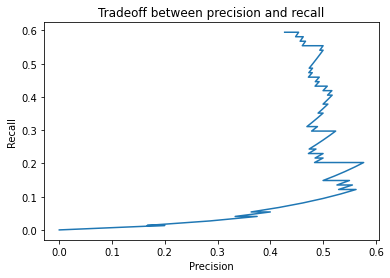

In [40]:
# plotting a trade of  between precision and recall
plt.plot(prec,rec)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Tradeoff between precision and recall")
plt.show()